<a href="https://colab.research.google.com/github/IgorElder/Alura/blob/main/notebook_gr%C3%A1ficos_comparacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Criando gráficos de comparação**

##**Carregando os dados**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/python_dados/refs/heads/main/Dados/loja_vendas.csv')

In [ ]:
df.head()

,ID_compra,unidade,cidade,data,horario,categoria_produto,valor_unitario,quantidade,valor_total,metodo_pagamento,ID_cliente,programa_cashback,idade,avaliacao_compra
0,6,Parque das nações,Santo André,2022-01-03,15:40,Eletrônicos,4457.9,4,17831.6,Dinheiro,6149,Sim,30,10
1,5,Oswaldo Cruz,São Caetano do Sul,2022-01-03,16:48,Ferramentas e construção,115.9,1,115.9,PIX,9491,Sim,36,9
2,9,Paulicéia,São Bernardo do Campo,2022-01-03,12:08,Beleza e cuidados pessoais,68.9,2,137.8,Cartão,5288,Não,39,9
3,4,Oswaldo Cruz,São Caetano do Sul,2022-01-03,9:29,Ferramentas e construção,80.9,5,404.5,PIX,9679,Sim,35,10
4,8,Parque das nações,Santo André,2022-01-03,13:02,Beleza e cuidados pessoais,165.0,4,660.0,PIX,1380,Não,50,9


Neste conjunto de dados, temos informações de uma loja de departamentos, incluindo registros das compras realizadas pelos clientes. Os dados abrangem variáveis numéricas, categóricas e as datas e horários das compras.

Podemos **realizar comparações** nesses dados para **identificar semelhanças, diferenças e padrões**.

Para começar, vamos analisar **qual unidade dessa rede de departamentos obteve o maior valor total de vendas**. Um **gráfico de colunas** é ideal para esta tarefa, pois permite visualizar facilmente as diferenças entre as categorias, destacando qual unidade tive o melhor desempenho.

Para criar esse gráfico, utilizaremos a [biblioteca Seaborn](https://seaborn.pydata.org/index.html), que é uma ferramenta poderosa e intuitiva para criar visualizações de dados:

In [ ]:
import seaborn as sns

##**Gráfico de colunas**

Para construir o gráficos de colunas, utilizaremos a função [`sns.barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html):

> 👩‍💻***Dica da Val:*** Usar `reset_index()` após um agrupamento com `groupby()` facilita o acesso às colunas, transformando o índice em uma sequência padrão (0, 1, 2,...) ao invés de considerar a coluna `categoria_produto` como índice, neste caso.

<Axes: xlabel='unidade', ylabel='valor_total'>

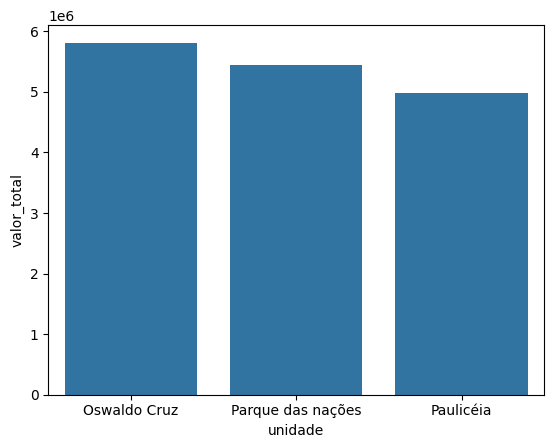

In [ ]:
# Agrupando por unidade e somando o valor total
df_unidade = df.groupby('unidade')['valor_total'].sum().reset_index()

# Criando o gráfico de colunas
sns.barplot(x='unidade', y='valor_total', data=df_unidade)

Também podemos **comparar a frequência de diferentes categorias** presentes nos dados. Por exemplo, para analisar quais métodos de pagamento foram mais utilizados nas compras, podemos usar a função [`sns.countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) da biblioteca Seaborn.

Essa função conta automaticamente a frequência de cada categoria em uma variável:

<Axes: xlabel='metodo_pagamento', ylabel='count'>

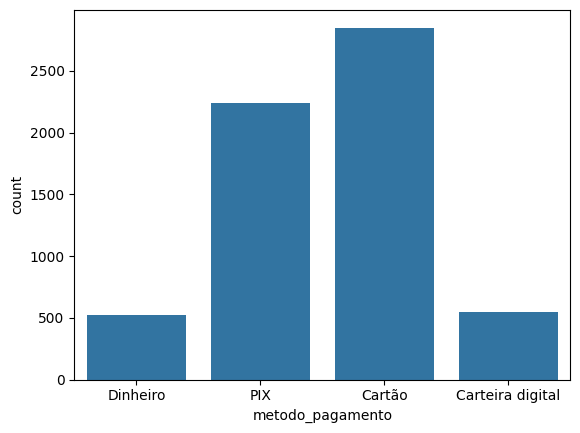

In [ ]:
# Criando o gráfico de contagem
sns.countplot(x='metodo_pagamento', data=df)

Só que, por padrão, o gráfico exibe as categorias na ordem em que aparecem no DataFrame. No entanto, essa disposição pode dificultar a análise e a comparação dos resultados. Para **tornar a visualização mais informativa e facilitar a interpretação**, o ideal é **ordenar as colunas de acordo com os valores**, como do maior para o menor. Isso ajuda a destacar as categorias mais relevantes e a criar uma análise mais clara e impactante.

Ordenando as categorias:

In [ ]:
# Ordenando os dados da maior contagem para menor
metodo_pagamento_contagem = df['metodo_pagamento'].value_counts()
metodo_pagamento_contagem

,count
metodo_pagamento,
Cartão,2851
PIX,2244
Carteira digital,547
Dinheiro,527


<Axes: xlabel='metodo_pagamento', ylabel='count'>

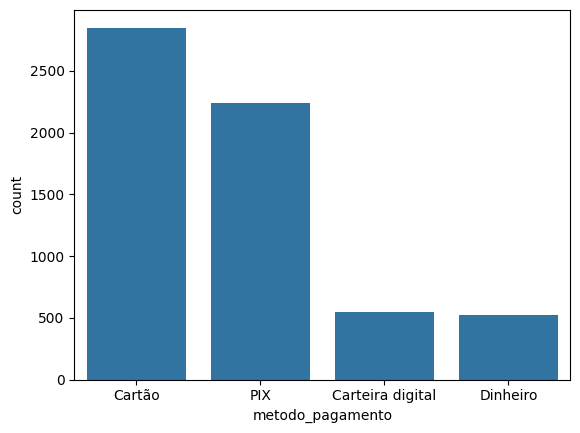

In [ ]:
# Criando o gráfico de contagem ordenado
sns.countplot(x='metodo_pagamento', data=df, order=metodo_pagamento_contagem.index)

E se quisermos **comparar diferentes categorias em relação a uma variável específica**?

Já sabemos a frequência dos métodos de pagamento, mas será que esses métodos variam entre as diferentes unidades da loja de departamentos?

É nesse caso que o **gráfico de colunas agrupadas** se torna útil. Ele permite comparar as categorias (como os métodos de pagamento) para cada unidade da loja, facilitando a visualização das variações e padrões entre elas.

Com esse gráfico, podemos observar claramente as diferenças nas preferências de pagamento de cada unidade, oferecendo uma análise mais detalhada e informativa.



##**Gráfico de colunas agrupadas**

Para fazer isso no Seaborn, é bem simples! Basta adicionar o parâmetro `hue` e especificar a variável que queremos usar para agrupar/comparar. O `hue` permite separar os dados de acordo com essa variável, diferenciando as categorias com cores distintas no gráfico.

Isso torna a visualização ainda mais clara e facilita a comparação entre as diferentes variáveis:

<Axes: xlabel='metodo_pagamento', ylabel='count'>

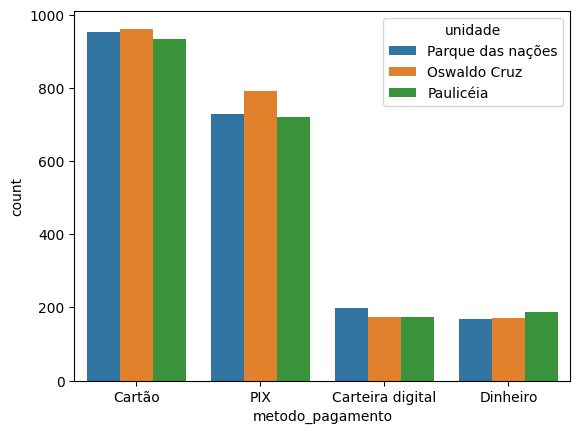

In [ ]:
# Criando o gráfico de contagem com hue
sns.countplot(x='metodo_pagamento', data=df, order=metodo_pagamento_contagem.index, hue='unidade')

> 👩‍💻***Dica da Val:*** Por padrão, ao definir o `hue`, o Seaborn escolhe automaticamente as cores para diferenciar as categorias. No entanto, você pode personalizar essas cores de acordo com as suas preferências, utilizando listas de cores específicas ou [paletas pré-definidas do Seaborn](https://seaborn.pydata.org/tutorial/color_palettes.html). Isso permite ajustar a aparência do gráfico para torná-lo mais adequado à sua análise ou à estética desejada.

<Axes: xlabel='metodo_pagamento', ylabel='count'>

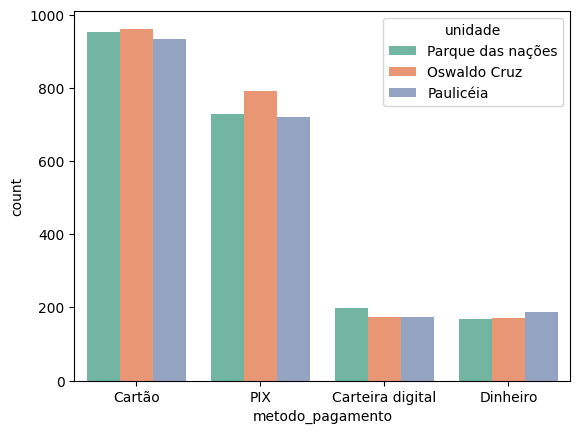

In [ ]:
# Definindo uma paleta de cores
sns.countplot(x='metodo_pagamento', data=df, order=metodo_pagamento_contagem.index, hue='unidade', palette='Set2')

##**Gráfico de Barras**

Até agora, trabalhamos com poucas categorias para as comparações. Mas e quando lidamos com **várias categorias**? Qual será o gráfico mais adequado para analisar essas comparações de forma clara?

Agora, vamos explorar as categorias de produtos vendidos e calcular o total de unidades vendidas em cada categoria. Para isso, precisaremos de um gráfico que nos ajude a comparar eficientemente um grande número de categorias.

Se criarmos um gráfico de colunas, o resultado ficará assim:

<Axes: xlabel='categoria_produto', ylabel='quantidade'>

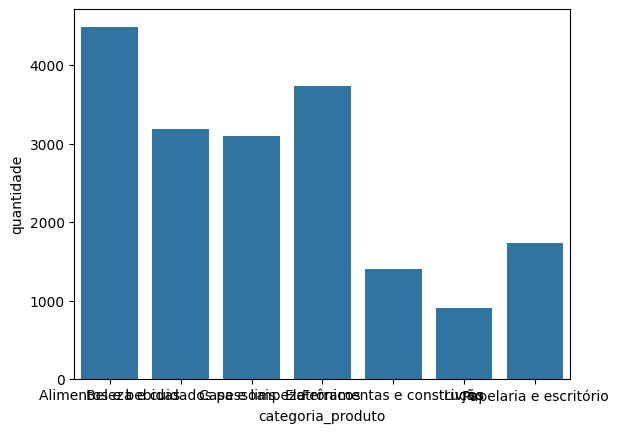

In [ ]:
# Agrupando por categoria e somando a quantidade
soma_categorias_produtos = df.groupby('categoria_produto')['quantidade'].sum().reset_index()

# Criando o gráfico de colunas
sns.barplot(x='categoria_produto', y='quantidade', data=soma_categorias_produtos)

Quando temos muitas categorias, os nomes delas podem acabar ficando sobrepostos, o que dificulta a leitura. Para resolver esse problema, podemos **alterar a orientação do gráfico**, transformando-o em um **gráfico de barras** horizontais. Isso proporciona mais espaço para exibir os rótulos de forma clara e melhora a visualização, especialmente quando lidamos com muitas categorias.

Para isso, basta ajustar os parâmetros da função barplot, invertendo o eixo x pelo y e o y pelo x:

<Axes: xlabel='quantidade', ylabel='categoria_produto'>

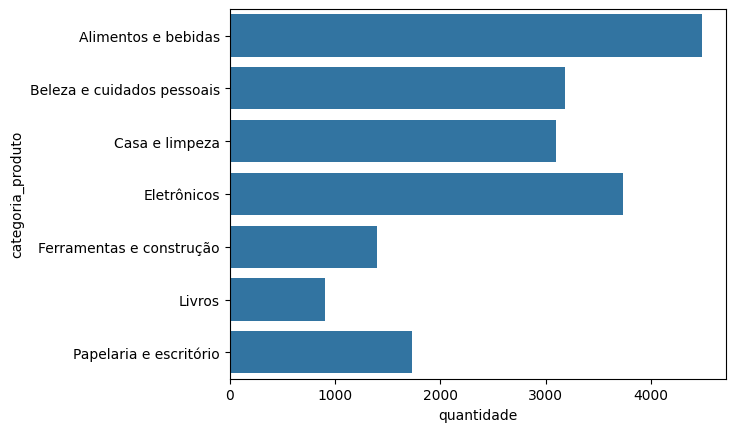

In [ ]:
# Criando o gráfico de barra
sns.barplot(y='categoria_produto', x='quantidade', data=soma_categorias_produtos)

Para melhorar a visualização, podemos fazer a **ordenação**, deixando a comparação mais intuitiva:

<Axes: xlabel='quantidade', ylabel='categoria_produto'>

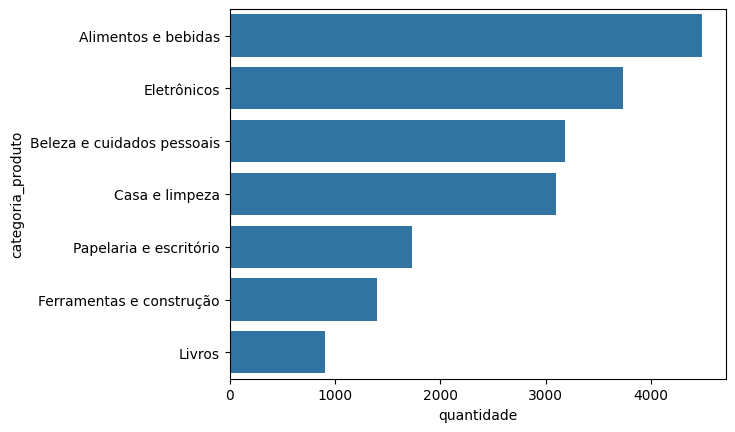

In [ ]:
# Ordenando os dados da maior quantidade para menor
soma_categorias_produtos_ordenado = soma_categorias_produtos.sort_values(by=['quantidade'], ascending=False)

# Criando o gráfico de barra ordenado
sns.barplot(y='categoria_produto', x='quantidade', data=soma_categorias_produtos_ordenado)

##**Gráfico de linhas**

Por fim, para concluir nossa análise de gráficos de comparação, vamos explorar os **dados relacionados ao tempo**, ou seja, as séries temporais.

Suponha que queiramos analisar o valor total das vendas de cada dia ao longo do período presente no nosso conjunto de dados, com base na coluna data.

O primeiro passo para realizar essa análise é **converter a coluna de data para o formato [datetime](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html)**. Isso nos permitirá trabalhar com ela de maneira mais eficaz, facilitando a manipulação e análise dos dados ao longo do tempo:

In [ ]:
# Transformando a coluna data em datetime
df['data'] = pd.to_datetime(df['data'], format='%Y-%m-%d')

Agora, vamos obter o valor total para cada dia e depois podemos exibir um gráfico de linhas com a função [sns.lineplot()](https://seaborn.pydata.org/generated/seaborn.lineplot.html), ideal para representar as tendências ao longo do tempo, ou de acordo com uma sequência que possui ordenação:

<Axes: xlabel='data', ylabel='valor_total'>

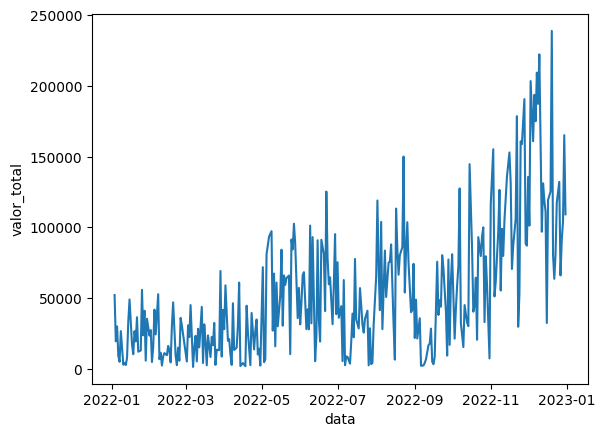

In [ ]:
# Agrupando por data e somando o valor total
vendas_diarias = df.groupby('data')['valor_total'].sum().reset_index()

# Criando o gráfico de linhas
sns.lineplot(x='data', y='valor_total', data=vendas_diarias)

Por fim, é possível realizar **customizações básicas** em todos os gráficos utilizando o [módulo pyplot da biblioteca matplotlib](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html). Você pode, por exemplo, ajustar o tamanho do gráfico, adicionar título e rótulos aos eixos, modificar o tamanho das fontes, aplicar o método `despine()` da seaborn para remover bordas, e usar o comando `plt.show()` para exibir apenas o gráfico:

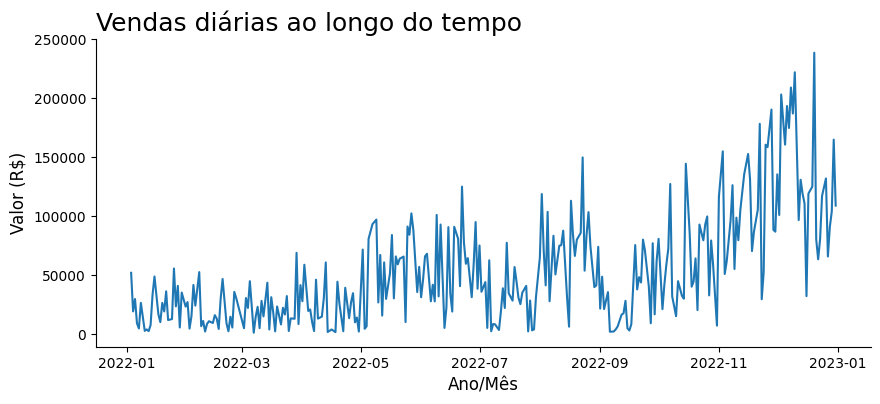

In [ ]:
import matplotlib.pyplot as plt

# Definindo o tamanho da figura
plt.figure(figsize=(10, 4))

# Plotando o gráfico
sns.lineplot(x='data', y='valor_total', data=vendas_diarias)

# Definindo o título do gráfico
plt.title('Vendas diárias ao longo do tempo', loc='left', fontsize=18)

# Definindo a label do eixo x
plt.xlabel('Ano/Mês', fontsize=12)

# Definindo a label do eixo y
plt.ylabel('Valor (R$)', fontsize=12)

# Removendo a borda do gráfico
sns.despine()

# Exibindo o gráfico
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = 'https://raw.githubusercontent.com/alura-cursos/python_dados/refs/heads/main/Dados/dados_automoveis.csv'

In [ ]:
pd.read_csv(url)

,Marca,Modelo,Ano,Tipo_combustivel,Potencia_motor,Cilindros_motor,Tipo_transmissao,Rodas_motrizes,Numero_portas,Tamanho,Estilo,Consumo_estrada_milhas,Consumo_cidade_milhas,Valor($)
0,GMC,Envoy XL,2005,gasolina comum,275.0,6.0,automatico,tracao traseira,4.0,grande,SUV 4 portas,18,13,29695
1,Volkswagen,Passat,2016,gasolina comum,170.0,4.0,automatico,tracao dianteira,4.0,medio,seda,38,25,30495
2,Honda,Odyssey,2016,gasolina comum,248.0,6.0,automatico,tracao dianteira,4.0,grande,minivan de passageiros,28,19,37650
3,Chevrolet,Cruze,2015,gasolina comum,138.0,4.0,manual,tracao dianteira,4.0,medio,seda,36,25,16170
4,Volvo,740,1991,gasolina comum,162.0,4.0,automatico,tracao traseira,4.0,medio,seda,20,17,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10913,Toyota,Venza,2014,gasolina comum,181.0,4.0,automatico,tracao dianteira,4.0,medio,perua,26,20,27950
10914,Pontiac,G6,2009,flex (gasolina/E85),219.0,6.0,automatico,tracao dianteira,4.0,medio,seda,26,17,24710
10915,Volkswagen,Golf GTI,2016,gasolina premium (recomendada),220.0,4.0,manual automatizado,tracao dianteira,2.0,compacto,hatchback 2 portas,33,25,27590
10916,Saab,9-5,2009,gasolina premium (recomendada),260.0,4.0,automatico,tracao dianteira,4.0,medio,perua,27,17,43270


In [ ]:
df_carros = pd.read_csv(url)

In [ ]:
df_carros = df_carros.groupby('Tamanho')['Valor($)'].mean(numeric_only=True).reset_index()

In [ ]:
df_carros = df_carros.sort_values(by=['Valor($)'], ascending=False)

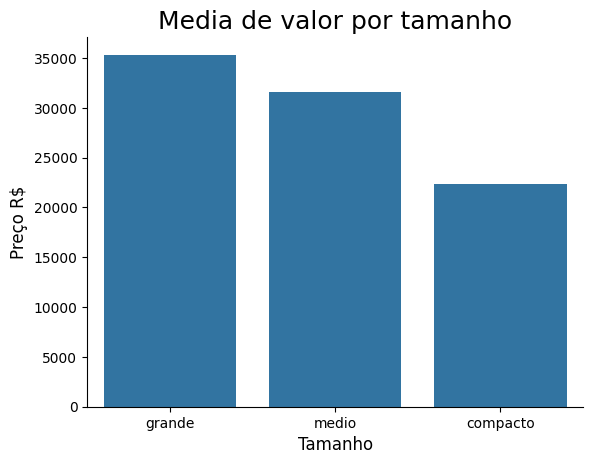

In [ ]:
sns.barplot(x='Tamanho',y='Valor($)',data=df_carros)
plt.title('Media de valor por tamanho', loc='center', fontsize=18)
plt.xlabel('Tamanho', fontsize=12)
plt.ylabel('Preço R$', fontsize=12)
sns.despine()

In [ ]:
df_estilo = pd.read_csv(url)
df_estilo = df_estilo.groupby('Estilo')['Valor($)'].mean(numeric_only=True).reset_index()

In [ ]:
df_estilo.sort_values(by='Valor($)',ascending=False,inplace=True)

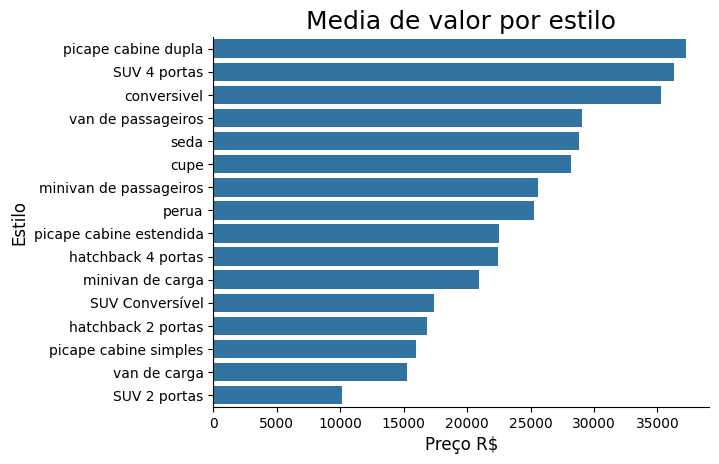

In [ ]:
sns.barplot(x='Valor($)',y='Estilo',data=df_estilo)
plt.title('Media de valor por estilo', loc='center', fontsize=18)
plt.ylabel('Estilo', fontsize=12)
plt.xlabel('Preço R$', fontsize=12)
sns.despine()

In [ ]:
url = ('https://raw.githubusercontent.com/alura-cursos/python_dados/refs/heads/main/Dados/poluentes.csv')

In [ ]:
df_poluente = pd.read_csv(url)
df_poluente['Data'] = pd.to_datetime(df_poluente['Data'], format='%Y-%m-%d')

In [ ]:
df_poluente

,Data,PM2.5,PM10,SO2,NO2,CO,O3,TEMP
0,2020-03-01,7.0,11.0,12.0,23.0,429.0,64.0,1.0
1,2020-03-02,31.0,42.0,37.0,67.0,825.0,30.0,1.0
2,2020-03-03,77.0,121.0,61.0,81.0,1621.0,19.0,6.0
3,2020-03-04,23.0,45.0,23.0,46.0,606.0,54.0,10.0
4,2020-03-05,149.0,184.0,94.0,133.0,2358.0,68.0,6.0
...,...,...,...,...,...,...,...,...
1455,2024-02-24,22.0,33.0,17.0,59.0,575.0,51.0,5.0
1456,2024-02-25,11.0,20.0,7.0,43.0,421.0,66.0,7.0
1457,2024-02-26,28.0,41.0,10.0,65.0,721.0,49.0,7.0
1458,2024-02-27,75.0,97.0,21.0,98.0,1427.0,37.0,8.0


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['PM2.5'].plot(kind='hist', bins=20, title='PM2.5')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['PM10'].plot(kind='hist', bins=20, title='PM10')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['SO2'].plot(kind='hist', bins=20, title='SO2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='PM2.5', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='PM2.5', y='PM10', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='PM10', y='SO2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='SO2', y='NO2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Data']
  ys = series['PM2.5']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Data', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Data')
_ = plt.ylabel('PM2.5')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Data']
  ys = series['PM10']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Data', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Data')
_ = plt.ylabel('PM10')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Data']
  ys = series['SO2']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Data', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Data')
_ = plt.ylabel('SO2')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Data']
  ys = series['NO2']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Data', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Data')
_ = plt.ylabel('NO2')

from matplotlib import pyplot as plt
_df_12['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['PM2.5'].plot(kind='line', figsize=(8, 4), title='PM2.5')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['PM10'].plot(kind='line', figsize=(8, 4), title='PM10')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['SO2'].plot(kind='line', figsize=(8, 4), title='SO2')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df_poluente

,Data,PM2.5,PM10,SO2,NO2,CO,O3,TEMP
0,2020-03-01,7.0,11.0,12.0,23.0,429.0,64.0,1.0
1,2020-03-02,31.0,42.0,37.0,67.0,825.0,30.0,1.0
2,2020-03-03,77.0,121.0,61.0,81.0,1621.0,19.0,6.0
3,2020-03-04,23.0,45.0,23.0,46.0,606.0,54.0,10.0
4,2020-03-05,149.0,184.0,94.0,133.0,2358.0,68.0,6.0
...,...,...,...,...,...,...,...,...
1455,2024-02-24,22.0,33.0,17.0,59.0,575.0,51.0,5.0
1456,2024-02-25,11.0,20.0,7.0,43.0,421.0,66.0,7.0
1457,2024-02-26,28.0,41.0,10.0,65.0,721.0,49.0,7.0
1458,2024-02-27,75.0,97.0,21.0,98.0,1427.0,37.0,8.0


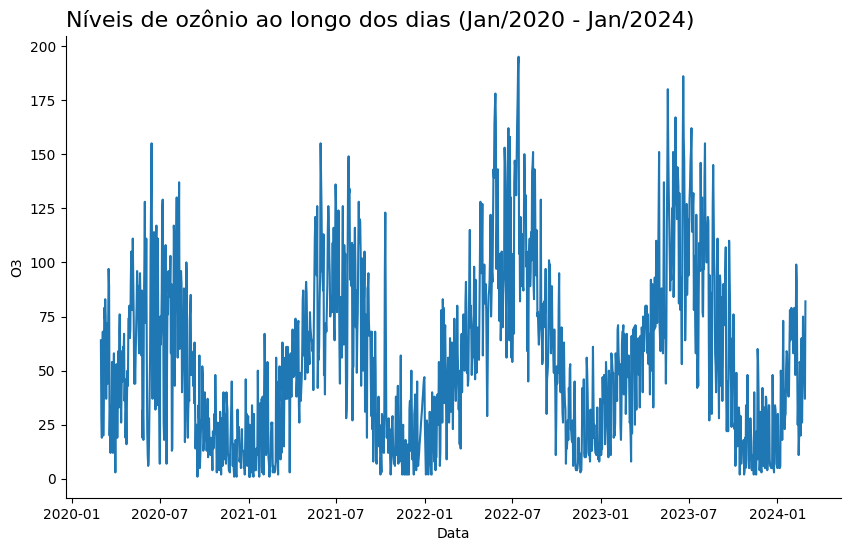

In [ ]:

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_poluente,x='Data',y='O3')
plt.title('Níveis de ozônio ao longo dos dias (Jan/2020 - Jan/2024)', loc='left', fontsize=16)
sns.despine()
plt.show()

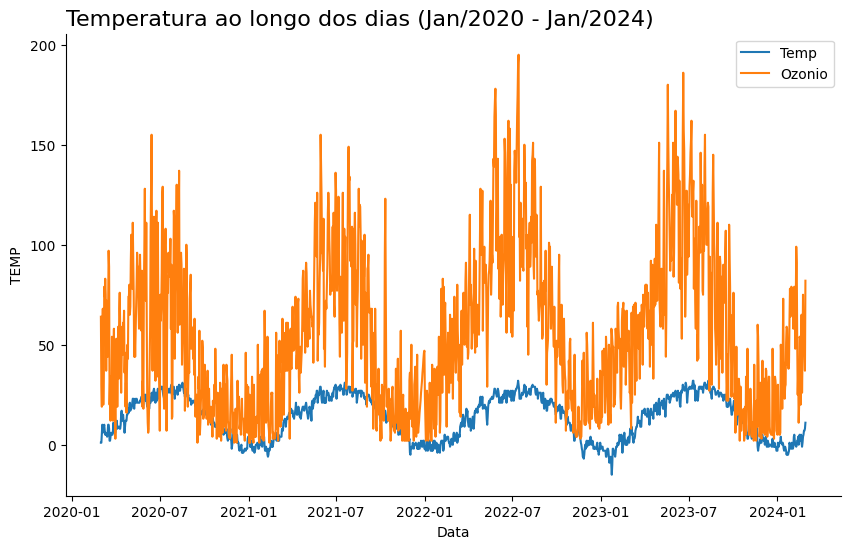

In [ ]:

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_poluente,x='Data',y='TEMP',label='Temp')
sns.lineplot(data=df_poluente,x='Data',y='O3',label='Ozonio')
plt.title('Temperatura ao longo dos dias (Jan/2020 - Jan/2024)', loc='left', fontsize=16)
sns.despine()
plt.show()

In [ ]:
url = 'https://raw.githubusercontent.com/alura-cursos/python_dados/refs/heads/main/Dados/apartamentos_aluguel.csv'

In [ ]:
df_regiao_aluguel = pd.read_csv(url)

In [ ]:
df_regiao_aluguel = df_regiao_aluguel.groupby('Regiao')['Valor'].mean().reset_index()

In [ ]:
df_regiao_aluguel.sort_values(by='Valor',inplace=True,ascending=False)

In [ ]:
df_regiao_aluguel

,Regiao,Valor
3,Oeste,3590.162451
0,Centro,3001.555556
4,Sul,2976.616363
2,Norte,1994.897152
1,Leste,1697.117310


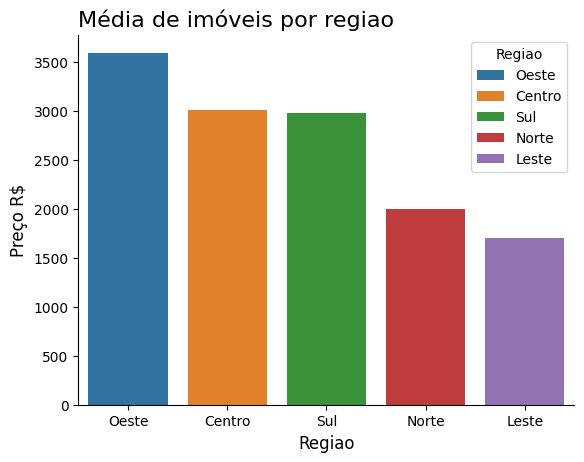

In [ ]:
sns.barplot(data=df_regiao_aluguel,x='Regiao',y='Valor',hue='Regiao',legend=True)
plt.title('Média de imóveis por regiao', loc='left', fontsize=16)
plt.xlabel('Regiao', fontsize=12)
plt.ylabel('Preço R$', fontsize=12)
sns.despine()
plt.show()

In [ ]:
df_ano_aluguel = pd.read_csv(url)
df_ano_aluguel

,Quartos,Banheiros,Suites,Vagas,Elevador,Mobiliado,Piscina,Regiao,Ano,Valor
0,2,2,1,1,Nao,Nao,Sim,Centro,2015,2500
1,1,2,1,2,Sim,Sim,Sim,Centro,2019,5000
2,1,2,1,1,Sim,Sim,Nao,Centro,2007,1600
3,2,2,1,1,Nao,Nao,Nao,Centro,2008,1500
4,3,3,1,1,Sim,Nao,Nao,Centro,2009,2200
...,...,...,...,...,...,...,...,...,...,...
7647,4,3,2,1,Sim,Sim,Sim,Norte,2021,5518
7648,1,3,2,0,Sim,Sim,Nao,Leste,2018,3216
7649,2,2,0,0,Sim,Sim,Sim,Leste,2015,3090
7650,2,2,1,3,Sim,Nao,Nao,Oeste,2014,3702


In [ ]:
df_ano_aluguel = df_ano_aluguel.groupby(by='Ano')['Valor'].mean().reset_index()
df_ano_aluguel.sort_values(by='Ano',inplace=True,ascending=True)

In [ ]:
df_ano_aluguel

,Ano,Valor
0,1998,955.798701
1,1999,1059.437229
2,2000,1110.494662
3,2001,1167.624224
4,2002,1267.341463
5,2003,1364.223368
6,2004,1443.289157
7,2005,1545.721854
8,2006,1594.024242
9,2007,1750.520270


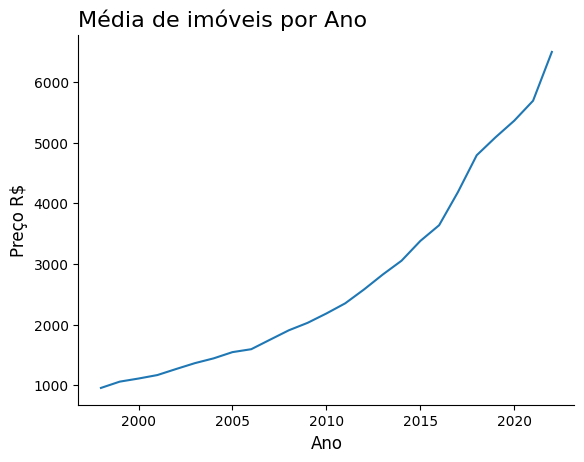

In [ ]:
sns.lineplot(data=df_ano_aluguel,x='Ano',y='Valor')
plt.title('Média de imóveis por Ano', loc='left', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Preço R$', fontsize=12)
sns.despine()
plt.show()

In [ ]:
url = 'https://raw.githubusercontent.com/alura-cursos/python_dados/refs/heads/main/Dados/pacientes_doenca_cardiaca.csv'

In [ ]:
df_categoria_dor = pd.read_csv(url)
df_categoria_dor

,Idade,Sexo_biologico,Tipo_dor,Pressao_arterial,Colesterol,Glicemia_jejum>120,Resultados_ECG,Frequencia_cardiaca_max,Dor_exercicio,Depressao_ST,Inclinacao_ST,Numero_vasos_fluro,Teste_cintilografia,Doenca_cardiaca
0,70,Masculino,assintomática,130,322,Não,2,109,Não,2.4,2,3,3,Sim
1,67,Feminino,dor não anginosa,115,564,Não,2,160,Não,1.6,2,0,7,Não
2,57,Masculino,angina atípica,124,261,Não,0,141,Não,0.3,1,0,7,Sim
3,64,Masculino,assintomática,128,263,Não,0,105,Sim,0.2,2,1,7,Não
4,74,Feminino,angina atípica,120,269,Não,2,121,Sim,0.2,1,1,3,Não
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,Masculino,dor não anginosa,172,199,Sim,0,162,Não,0.5,1,0,7,Não
266,44,Masculino,angina atípica,120,263,Não,0,173,Não,0.0,1,0,7,Não
267,56,Feminino,angina atípica,140,294,Não,2,153,Não,1.3,2,0,3,Não
268,57,Masculino,assintomática,140,192,Não,0,148,Não,0.4,2,0,6,Não


In [ ]:
df_categoria_dor = df_categoria_dor.groupby('Tipo_dor')['Idade'].count().reset_index()

In [ ]:
df_categoria_dor.sort_values(by='Idade',inplace=True,ascending=False)

In [ ]:
df_categoria_dor

,Tipo_dor,Idade
2,assintomática,129
3,dor não anginosa,79
0,angina atípica,42
1,angina típica,20


<Axes: xlabel='Tipo_dor', ylabel='Idade'>

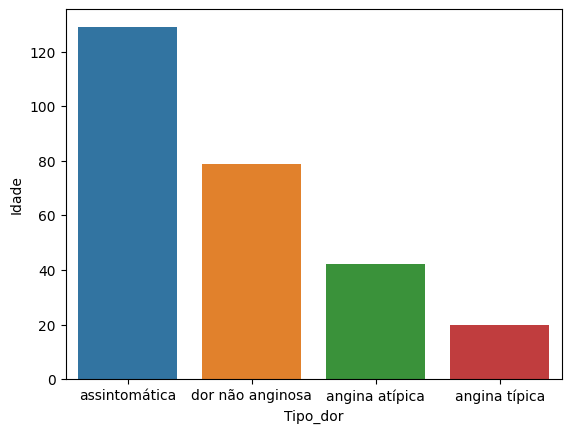

In [ ]:
sns.barplot(data=df_categoria_dor,x='Tipo_dor',y='Idade',hue='Tipo_dor')

In [ ]:
url = 'https://raw.githubusercontent.com/alura-cursos/python_dados/refs/heads/main/Dados/dados_jogos.csv'

In [ ]:
df_dados_jogos = pd.read_csv(url)

In [ ]:
df_dados_jogos

,classificacao,nome,plataforma,ano,genero,desenvolvedor,vendas_america_norte,vendas_europa,vendas_japao,outras_vendas,vendas_globais
0,1,Wii Sports,Wii,2006.0,Esportes,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Plataforma,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Corrida,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Esportes,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,RPG,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Plataforma,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Tiro,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Corrida,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Quebra-cabeça,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [ ]:
df_dados_jogos = df_dados_jogos.groupby(by='genero')['vendas_globais'].sum().reset_index()

In [ ]:
df_dados_jogos.sort_values(by='vendas_globais',ascending=False,inplace=True)

In [ ]:
df_dados_jogos

,genero,vendas_globais
1,Ação,1751.18
4,Esportes,1330.93
11,Tiro,1037.37
9,RPG,927.37
7,Plataforma,831.37
3,Diversos,809.96
2,Corrida,732.04
6,Luta,448.91
10,Simulação,392.20
8,Quebra-cabeça,244.95


<Axes: xlabel='vendas_globais', ylabel='genero'>

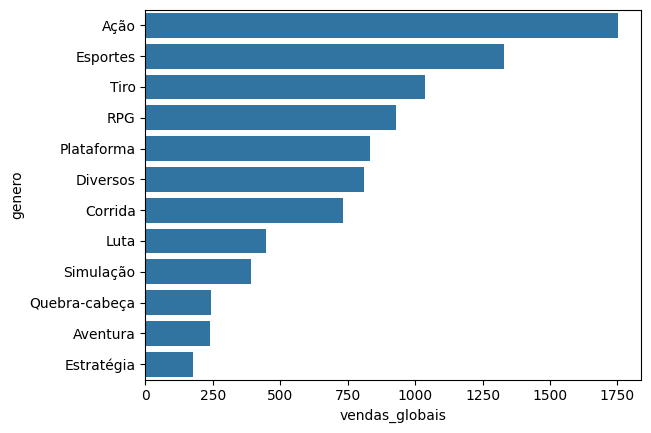

In [ ]:
sns.barplot(data=df_dados_jogos, x='vendas_globais',y='genero')

In [ ]:
df_dados_jogos = df_dados_jogos.groupby(by='genero')['vendas_japao'].sum().reset_index()
df_dados_jogos.sort_values(by='vendas_japao',ascending=False,inplace=True)
df_dados_jogos

,genero,vendas_japao
9,RPG,352.31
1,Ação,159.95
4,Esportes,135.37
7,Plataforma,130.77
3,Diversos,107.76
6,Luta,87.35
10,Simulação,63.70
8,Quebra-cabeça,57.31
2,Corrida,56.69
0,Aventura,52.07


<Axes: xlabel='vendas_japao', ylabel='genero'>

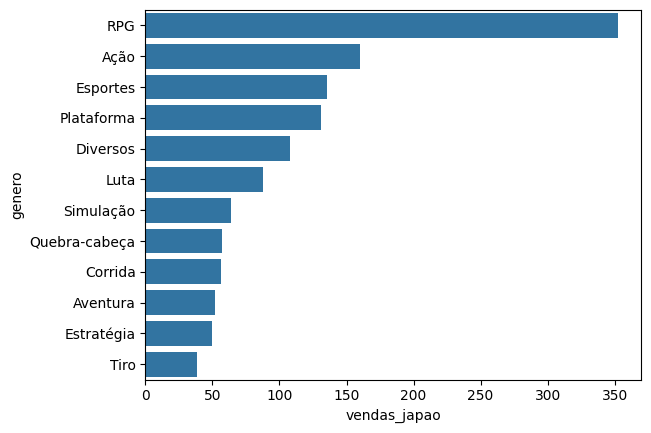

In [ ]:
sns.barplot(data=df_dados_jogos, x='vendas_japao',y='genero')

In [ ]:
url = 'https://raw.githubusercontent.com/alura-cursos/python_dados/refs/heads/main/Dados/dataset_vendas.csv'

In [ ]:
df_ecomercio = pd.read_csv(url)

In [ ]:
df_ecomercio

,Categoria,Regiao,Vendas
0,Eletrônicos,América do Norte,120
1,Eletrônicos,Europa,100
2,Eletrônicos,Ásia,130
3,Móveis,América do Norte,80
4,Móveis,Europa,90
5,Móveis,Ásia,70
6,Roupas,América do Norte,150
7,Roupas,Europa,160
8,Roupas,Ásia,140
9,Alimentos,América do Norte,200


<Axes: xlabel='Categoria', ylabel='Vendas'>

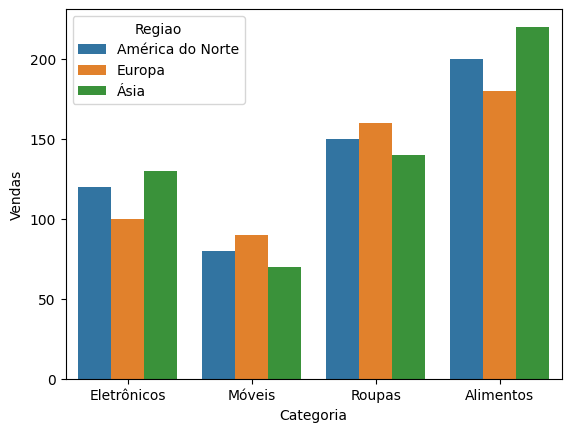

In [ ]:
# Criando o gráfico de contagem com hue
sns.barplot(x='Categoria', y='Vendas', data=df_ecomercio, hue='Regiao')